In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
import plotly.graph_objs as go
import plotly.io as pio
import plotly.offline as pyo
from matplotlib import cm, _cm
import math
from mpl_toolkits.mplot3d import Axes3D
import pylab as plb
import scipy as sp
import scipy.sparse as sparse
import scipy.sparse.linalg
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

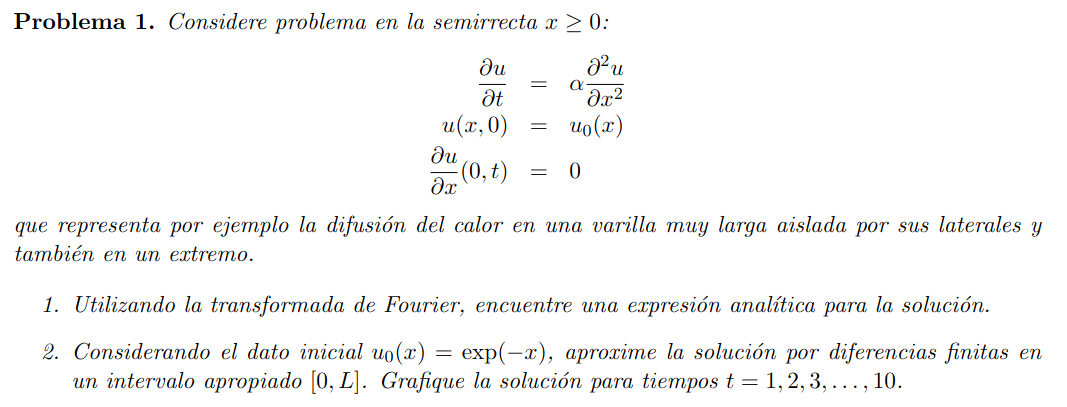

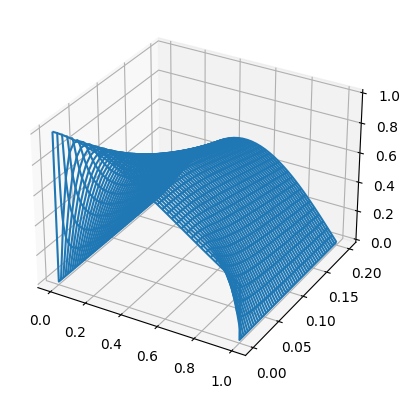

In [60]:
M = 40 # puntos de la grilla de x
N = 1000 # miro 1000 tiempos (con 10 para números enteros había un problema numérico y lo saqué)

x0 = 0
xL = 1 # unit grid differences

dx = (xL - x0) / (M - 1) # space step

t0 = 0
tF = 0.2

dt = (tF - t0) / (N - 1)

D = 0.3 # thermal diffusivity (alpha que teníamos multiplicando)
a = D * dt / dx**2

# Create grid
tspan = np.linspace(t0, tF, N)
xspan = np.linspace(x0, xL, M)


# Initial matrix solution
U = np.zeros((M, N))

# Initial condition
U[:, 0] = np.exp(-xspan**2)

# El algoritmo de diferencias finitas
for k in range(0, N-1):
    for i in range(1, M-1):
        U[i, k+1] = a * U[i-1, k] + (1 - 2 * a) * U[i, k] + a * U[i + 1, k]

# Los últimos dos términos son del término no lineal de Burgers.
Tspan, Xspan = np.meshgrid(tspan, xspan)

ax = plt.axes(projection ='3d')
ax.plot_wireframe(Xspan, Tspan, U)

plt.show()

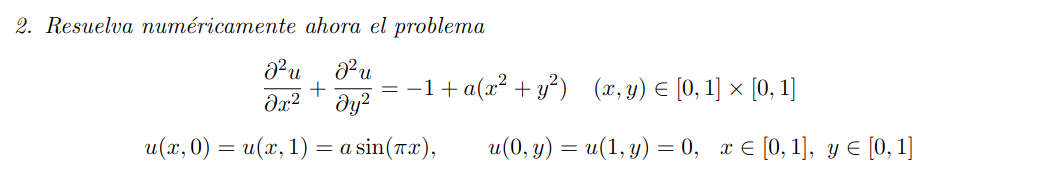

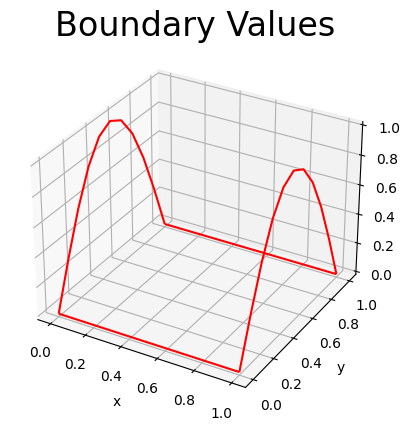

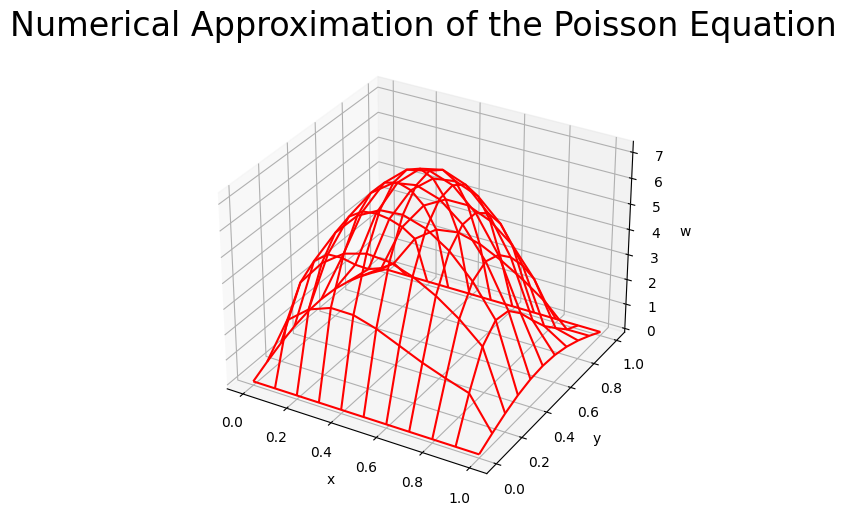

In [61]:
N=10
h=1/N
x=np.arange(0,1.0001,h)
y=np.arange(0,1.0001,h)
X, Y = np.meshgrid(x, y)
a = 1
w=np.zeros((N+1,N+1))

for i in range (0,N):
        w[i,0]=a * np.sin(np.pi*x[i]) #left Boundary
        w[i,N]=a * np.sin(np.pi*x[i]) #Right Boundary

for j in range (0,N):
        w[0,j]= 0  #Lower Boundary
        w[N,j]= 0 #Upper Boundary

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot a basic wireframe.
ax.plot_wireframe(X, Y, w,color='r', rstride=10, cstride=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w')
plt.title(r'Boundary Values',fontsize=24,y=1.08)
plt.show()

N2=(N-1)*(N-1)
r=np.zeros(N2)

# vector r
for i in range (0,N-1):
    for j in range (0,N-1):
        r[i+(N-1)*j]= -1 + a*h*h*(x[i+1]*x[i+1]+y[j+1]*y[j+1])
# Boundary
b_bottom_top=np.zeros(N2)
for i in range (0,N-1):
    b_bottom_top[i]=np.sin(2*np.pi*x[i+1]) #Bottom Boundary
    b_bottom_top[i+(N-1)*(N-2)]=np.sin(2*np.pi*x[i+1])# Top Boundary

b_left_right=np.zeros(N2)
for j in range (0,N-1):
    b_left_right[(N-1)*j]=2*np.sin(2*np.pi*y[j+1]) # Left Boundary
    b_left_right[N-2+(N-1)*j]=2*np.sin(2*np.pi*y[j+1])# Right Boundary

b=b_left_right+b_bottom_top

C=np.dot(Ainv,r-b)
w[1:N,1:N]=C.reshape((N-1,N-1))

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d');
# Plot a basic wireframe.
ax.plot_wireframe(X, Y, w,color='r');
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('w');
plt.title(r'Numerical Approximation of the Poisson Equation',fontsize=24,y=1.08);
plt.show();



Resolvi el 2b y c juntos. Aclaración: para el ítem de a = 0, nos queda una función "planchada" que representa que habría una gravedad igual a cero, no hay gravedad en la aproximación. Es decir, no hay aceleración, y no cambia la velocidad para ningún tiempo.

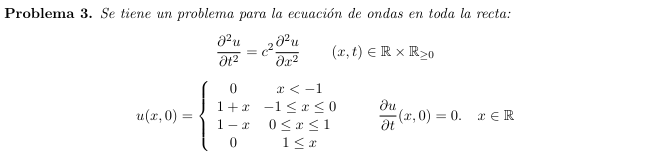

La solución analítica del 3a la escribí muy por arriba en la hoja, pero da algo así (quedó muy desprolijo e incompleto en el parcial, así que lo volví a pasar):

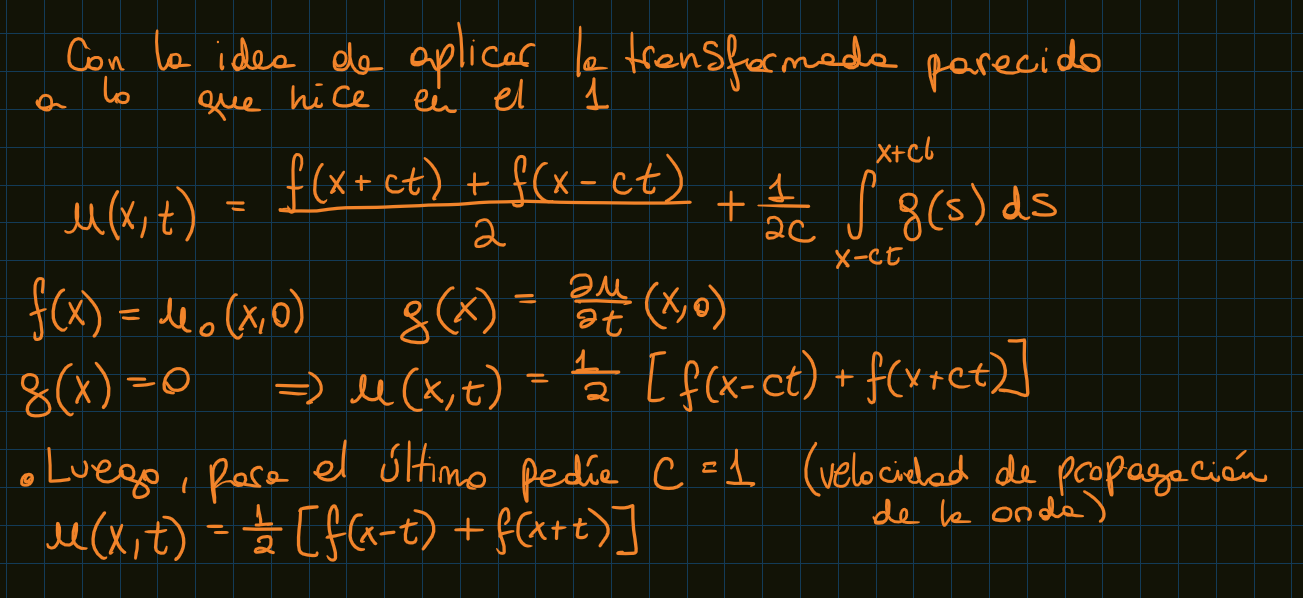

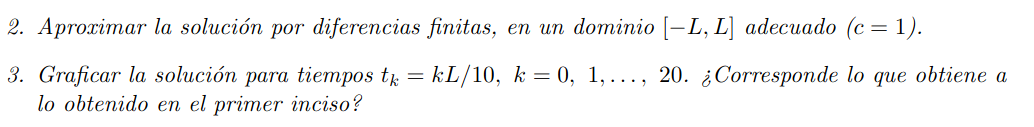

Primero visualicemos las condiciones a tiempo inicial = 0

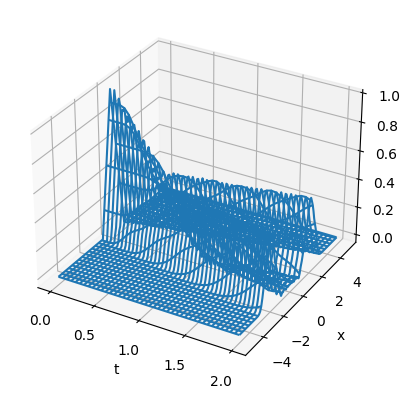

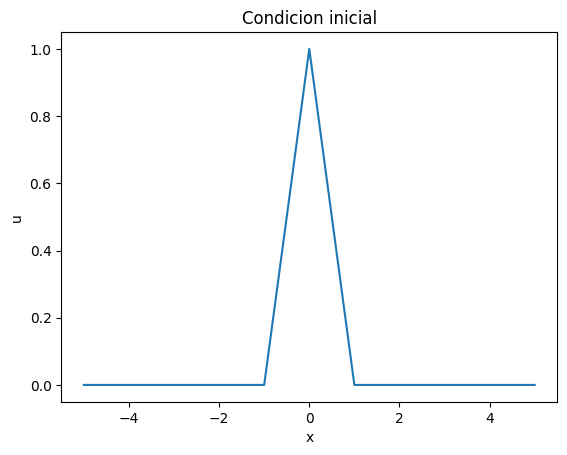

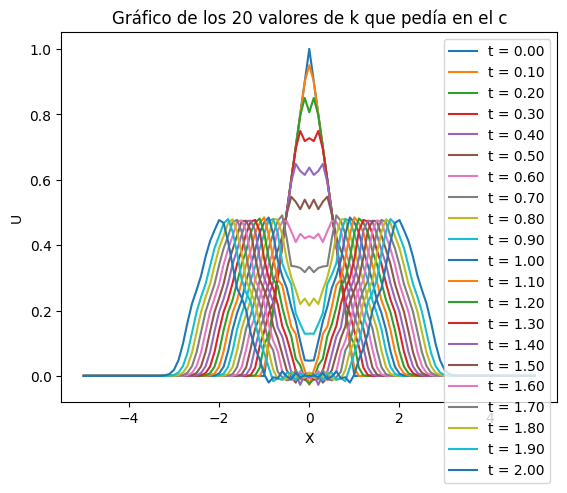

In [62]:
dx = 0.1
dt = 0.05
tmin = 0.0
tmax = 2.0
xmin = -5.0
xmax = 5.0
c = 1.0
rsq = (c * dt / dx) ** 2  # aparece en la solución de diferencias finitas

# Número de puntos en la grilla
nx = int((xmax - xmin) / dx) + 1
nt = int((tmax - tmin) / dt) + 2

# Matriz de solución
u = np.zeros((nt, nx))

# Condición inicial (función partida)
def condicion_inicial(x):
    if x < -1:
        return 0
    elif -1 <= x <= 0:
        return 1 + x
    elif 0 <= x <= 1:
        return 1 - x
    else:
        return 0

# Inicializar condiciones iniciales
for a in range(nx):
    u[0, a] = condicion_inicial(xmin + a * dx)
    u[1, a] = u[0, a]  # la derivada temporal u_t(0, x) = 0

# Simular dinámica usando diferencias finitas
for t in range(1, nt - 1):
    for a in range(1, nx - 1):
        u[t + 1, a] = 2 * (1 - rsq) * u[t, a] - u[t - 1, a] + rsq * (u[t, a - 1] + u[t, a + 1])

# Crear grilla para graficar
t = np.linspace(tmin, tmax, nt)
x = np.linspace(xmin, xmax, nx)
X, T = np.meshgrid(x, t)

# Gráfico 3D
ax = plt.axes(projection='3d')
ax.plot_wireframe(T, X, u)
ax.set_xlabel('t')
ax.set_ylabel('x')
plt.show()

#Condición inicial:
plt.plot(x, (np.heaviside(x+1, 0)-np.heaviside(x, 0)) * (1 +x) + (np.heaviside(x, 0)-np.heaviside(x-1, 0)) * (1 -x))
plt.title("Condicion inicial")
plt.xlabel("x")
plt.ylabel("u")
plt.show()

# Graficar la solución para tiempos específicos
for k in range(0, 21):
    plt.plot(x, u[int(k * (nt - 1) / 20), :], label=f't = {k * tmax / 20:.2f}')

plt.xlabel('X')
plt.ylabel('U')
plt.title('Gráfico de los 20 valores de k que pedía en el c')
plt.legend()
plt.show()

Pareciera como que es una onda que con el tiempo se va expandiendo para los costados.